In [1]:
%matplotlib ipympl

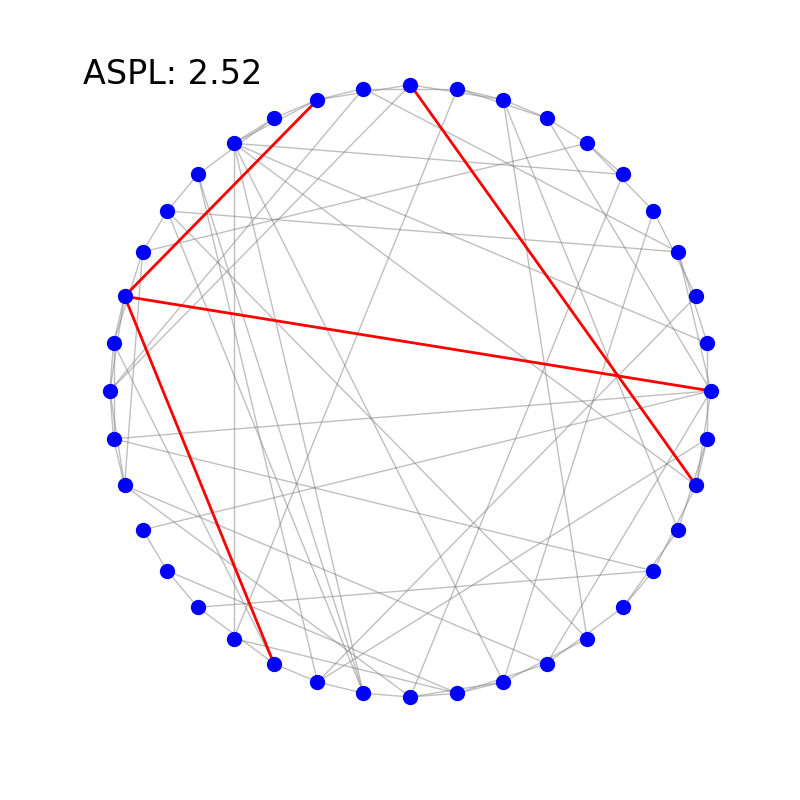

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation, FFMpegWriter


# Create an empty graph
G = nx.watts_strogatz_graph(40, 5, 0.5)
G = nx.subgraph(G, list(nx.connected_components(G))[0])

S = random.sample(list(nx.non_edges(G)), 15)


# Get the positions of the nodes
#pos = nx.spring_layout(G)
pos = nx.circular_layout(G)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the initial graph with nodes only
#nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', ax=ax)
#nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)

aspl = nx.average_shortest_path_length(G)
b = aspl
a = aspl * 0.7

# Animation function
def animate(i):
    global aspl
    ax.clear()
    ax.set_frame_on(False)
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, ax=ax)
    if i > 2:
        edges = random.sample(S, 4)
        aspl = random.uniform(a,b)
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=1.0, edge_color='red', ax=ax)
        
    plt.text(0.05, 0.95, f"ASPL: {aspl:.2f}", transform=plt.gca().transAxes, fontsize=24, verticalalignment='top')

fig.tight_layout()
# Create the animation
ani = FuncAnimation(fig, animate, frames=1000, interval=1000, repeat=False)
ani.save(filename="animation.gif", writer="pillow")
mpeg = FFMpegWriter(fps=5)
ani.save(filename="animation.mov", writer=mpeg)
# Display the animation
plt.axis('off')

plt.show()